In [5]:
import matplotlib.pyplot as plt
import numpy as np

from nd.plot_utils import (struct_weight_plot_linear_N,
                           struct_weight_plot_linear_k,
                           unstruct_weight_plot_mu)
from scipy.stats import lognorm

%matplotlib inline

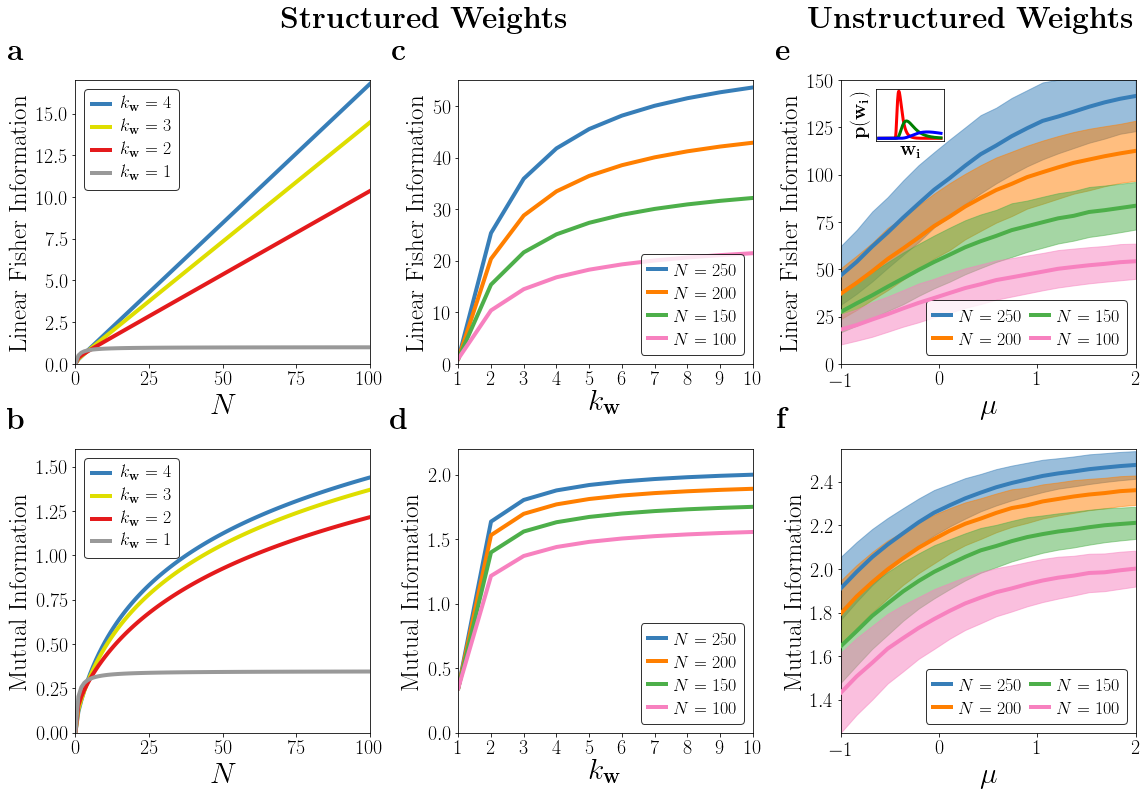

In [6]:
fig, axes = plt.subplots(2, 3, figsize=(19, 12))

######################
# Structured Weights #
######################
# Figure 1a
struct_weight_plot_linear_N(
    Ns=np.arange(101),
    ks=np.array([4, 3, 2, 1]),
    plot='FI_linear',
    version=1,
    fax=(fig, axes[0, 0]))
# Figure 1b
struct_weight_plot_linear_N(
    Ns=np.arange(101),
    ks=np.array([4, 3, 2, 1]),
    plot='MI_linear',
    version=1,
    fax=(fig, axes[1, 0]))
# Figure 1c
struct_weight_plot_linear_k(
    Ns=np.array([250, 200, 150, 100]),
    ks=np.arange(1, 11),
    plot='FI_linear',
    fax=(fig, axes[0, 1]))
# Figure 1d
struct_weight_plot_linear_k(
    Ns=np.array([250, 200, 150, 100]),
    ks=np.arange(1, 11),
    plot='MI_linear',
    fax=(fig, axes[1, 1]))

########################
# Unstructured Weights #
########################

reps = 5000
# Figure 1e
unstruct_weight_plot_mu(
    Ns=np.array([250, 200, 150, 100]),
    mus=np.linspace(-1, 2, 20),
    sigma=1.,
    repetitions=reps,
    plot='FI_linear',
    fax=(fig, axes[0, 2]))
# Figure 1f
unstruct_weight_plot_mu(
    Ns=np.array([250, 200, 150, 100]),
    mus=np.linspace(-1, 2, 20),
    sigma=1.,
    repetitions=reps,
    plot='MI_linear',
    fax=(fig, axes[1, 2]))
# Figure 1e - inset
inset = fig.add_axes([0.71, 0.81, 0.05, 0.06])

x = np.linspace(0, 4, 200)
inset.plot(x, lognorm.pdf(x-1, s=0.5, scale=np.exp(-1)), color='r', linewidth=3)
inset.plot(x, lognorm.pdf(x-1, s=0.5, scale=np.exp(0)), color='g', linewidth=3)
inset.plot(x, lognorm.pdf(x-1, s=0.5, scale=np.exp(1)), color='b', linewidth=3)

inset.tick_params(labelsize=15)
inset.set_xticks([])
inset.set_yticks([])
inset.set_yticklabels([])

inset.set_xlabel(r'$\mathbf{w_i}$', fontsize=20)
inset.set_ylabel(r'$\mathbf{p(w_i)}$', fontsize=20)
inset.set_facecolor('white')

# edges of inset
for spine in inset.spines.values():
    spine.set_edgecolor('k')

# Figure labels
axes[0, 0].set_ylabel('Linear Fisher Information', fontsize=25)
axes[0, 1].set_ylabel('Linear Fisher Information', fontsize=25)
axes[0, 2].set_ylabel('Linear Fisher Information', fontsize=25)

axes[1, 0].set_ylabel('Mutual Information', fontsize=25)
axes[1, 1].set_ylabel('Mutual Information', fontsize=25)
axes[1, 2].set_ylabel('Mutual Information', fontsize=25)

axes[0, 0].set_ylim([0, 17])
axes[1, 0].set_ylim([0, 1.6])
axes[0, 1].set_ylim([0, 55])
axes[1, 1].set_ylim([0, 2.2])

axes[0, 2].set_xlim([-1, 2.0])
axes[0, 2].set_ylim([0, 150])
axes[1, 2].set_xlim([-1, 2.0])
axes[1, 2].set_ylim([1.25, 2.55])

# Subplot references
axes[0, 0].text(
    x=-0.2, y=1.1, s=r'\textbf{a}',
    fontsize=30, 
    horizontalalignment='center',
    verticalalignment='center',
    transform=axes[0, 0].transAxes)

axes[0, 1].text(
    x=-0.2, y=1.1, s=r'\textbf{b}',
    fontsize=30,
    horizontalalignment='center',
    verticalalignment='center',
    transform=axes[1, 0].transAxes)

axes[0, 2].text(
    x=-0.2, y=1.1, s=r'\textbf{e}',
    fontsize=30,
    horizontalalignment='center',
    verticalalignment='center',
    transform=axes[0, 2].transAxes)

axes[1, 0].text(
    x=-0.2, y=1.1, s=r'\textbf{c}',
    fontsize=30,
    horizontalalignment='center',
    verticalalignment='center',
    transform=axes[0, 1].transAxes)

axes[1, 1].text(
    x=-0.2, y=1.1, s=r'\textbf{d}',
    fontsize=30,
    horizontalalignment='center',
    verticalalignment='center',
    transform=axes[1, 1].transAxes)

axes[1, 2].text(
    x=-0.2, y=1.1, s=r'\textbf{f}',
    fontsize=30,
    horizontalalignment='center',
    verticalalignment='center',
    transform=axes[1, 2].transAxes)

# figure titles
fig.text(
    x=0.38, y=0.95, s=r'\textbf{Structured Weights}',
    horizontalalignment='center',
    verticalalignment='center',
    fontsize=30)

fig.text(
    x=0.78, y=0.95, s=r'\textbf{Unstructured Weights}',
    horizontalalignment='center',
    verticalalignment='center',
    fontsize=30)

plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.savefig('figure3.pdf', bbox_inches='tight')